# ANALYSE DU DATASET

Ce NoteBook a pour but d'étudier les données mises à disposition.

Il est constitué des parties suivantes :

- Accès aux données stockées sur Google Drive,
- Import des librairies,
- Chargement des données, 
- Premier nettoyage du dataset,
- Analyse du jeu de données,
- Feature engineering,
- Déséquilibre du jeu de données,
- Conclusion.

# Accès aux données stockées sur Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Chargement des données

In [ ]:
# Chargement des données
df = pd.read_csv("/content/drive/MyDrive/Gaetan_Travail/ML/nba_logreg.csv")

In [ ]:
# Vérifions que les données se soient bien chargées
print(f"df shape: {df.shape}\n")

nbr_lignes_original = df.shape[0]
nbr_col_original = df.shape[1]

df.head()

df shape: (1340, 21)



,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
#De quel type de colonnes/features est compose ce tableau ?
df.dtypes.value_counts()

float64    19
object      1
int64       1
dtype: int64

In [ ]:
# Inspectons le type des différentes colonnes,
# ainsi que la mémoire RAM consommée.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

Le dataset fourni contient 1340 lignes et 21 colonnes. Il occupe 220 KB de mémoire RAM. Il n'est composé que de données quantitatives (la colonne "Name" ne sera pas utilisée pour la modélisation).

On remarque que la feature "3P%" contient des valeurs "null". Nous allons vérifier cela.

# Premier nettoyage du dataset

In [ ]:
nbr_3Pperc_null = len(df[df["3P%"].isnull() == True])
perc_3Pperc_null = nbr_3Pperc_null/len(df)*100
print(f"Nombre de lignes sans valeurs 3P% = {nbr_3Pperc_null}")
print(f"Proportion de lignes sans valeurs 3P% = {perc_3Pperc_null:.2f} %")

Nombre de lignes sans valeurs 3P% = 11
Proportion de lignes sans valeurs 3P% = 0.82 %


11 lignes contiennent une valeur "null" pour la colonne "3P%".
Cela représente environ 0.82 % du nombre total de données à disposition.

In [ ]:
df[df["3P%"].isnull() == True]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


Remplaçons les valeurs "NaN" de 3P% par 0.

De plus, la colonne "Name" ne nous interressant pas pour la modélisation, nous pouvons la supprimer.

In [ ]:
# Remplacement des "NaN" par 0, colonne "3P%"
df["3P%"].fillna(0, inplace=True)

# Suppression de la colonne "Name"
df = df.drop(columns=["Name"]).reset_index(drop=True)

print(f"df shape: {df.shape}\n")
df.head()

df shape: (1340, 20)



,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# Analyses du jeu de données

À la lecture des descriptions des différentes colonnes, on peut émettre les hypothèses suivantes :

- FGM, FGA et FG% ont un lien en commun,
- 3P Made, 3PA et 3P% ont un lien en commun,
- FTM, FTA et FT% ont un lien en commun,
- OREB + DREB = REB.

Nous allons analyser les corrélations possibles entre les features afin d'éliminer toute redondance dans les données.

In [ ]:
# Liste des colonnes à étudier
list_col_corr = [
  ["FGM", "FGA", "FG%"],
  ["3P Made", "3PA", "3P%"],
  ["FTM", "FTA", "FT%"],
  ["OREB", "DREB", "REB"]
]

# Boucle for afin d'effectuer un test de pearson
for i, cols in enumerate(list_col_corr):
  print(f"Lien entre {cols[0]}, {cols[1]} et {cols[2]} :")

  # test de pearson pour "OREB", "DREB" et "REB"
  if i == len(list_col_corr) - 1:
    # calcul de la corrélation et de la p-value
    corr, pval = stats.pearsonr(
        df[cols[0]] + df[cols[1]],
        df[cols[2]]
    )

    # affichage du résultat
    print(f"Correlation = {corr}\np-value = {pval}")
  
  # test de pearson pour les autres colonnes
  else:    
    # calcul de la corrélation et de la p-value
    corr, pval = stats.pearsonr(
        (df[cols[0]] / df[cols[1]]).fillna(0) * 100,
        df[cols[2]]
    )

    # affichage du résultat
    print(f"Correlation = {corr}\np-value = {pval}")
  
  if i < len(list_col_corr) - 1:
    print("\n***************\n")

Lien entre FGM, FGA et FG% :
Correlation = 0.9901838640897617
p-value = 0.0

***************

Lien entre 3P Made, 3PA et 3P% :
Correlation = 0.7615212354799376
p-value = 2.9482628666410196e-254

***************

Lien entre FTM, FTA et FT% :
Correlation = 0.9321506400044662
p-value = 0.0

***************

Lien entre OREB, DREB et REB :
Correlation = 0.9997048276700528
p-value = 0.0


En se référant à la documentation de la fonction "pearsonr" dans scipy, on y lit :
"The p-value roughly indicates the probability of an uncorrelated system"

Donc H0 = Les variables ne sont pas corrélées.

Or, ici, à chaque test, la p-value est inférieure à 5%.
Donc, on rejette l'hypothèse H0.
Donc, il y a bien un lien de corrélation entre ces variables.

De plus, cette corrélation étant très forte, on peut affirmer qu'il y a une redondance de l'information.

De ce fait, nous pouvons :
- supprimer les colonnes FGM et FGA,
- supprimer les colonnes 3P Made et 3PA,
- supprimer les colonnes FTM et FTA,
- supprimer la colonne REB.

In [ ]:
# Suppression des colonnes FGM, FGA, 3P Made, 3Pa, FTM, FTA et RER
df = df.drop(columns=["FGM", "FGA", "3P Made", "3PA", "FTM", "FTA", "REB"])

print(f"df shape: {df.shape}\n")
df.head()

df shape: (1340, 13)



,GP,MIN,PTS,FG%,3P%,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,34.7,25.0,69.9,0.7,3.4,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,29.6,23.5,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,42.2,24.4,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,42.6,22.6,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,52.4,0.0,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
def corr_col_df(df, col_a_analyser):
  list_corr = []
  list_pval = []
  # liste des colonnes à analyser avec "col_a_analyser"
  list_cols = list(df.columns)
  list_cols.remove(col_a_analyser)  

  for col in list_cols:
    # correlation de pearson
    corr, pval = stats.pearsonr(
        df[col_a_analyser],
        df[col]
    )

    # stockage des valeurs calculées
    list_corr.append(corr)
    list_pval.append(pval)

  # dataFrame renvoyant la corrélation et pvalue entre notre col à analyser
  # et les autres
  return pd.DataFrame({
      f"{col_a_analyser} avec col": list_cols,
      "correlation": list_corr,
      "p-value": list_pval
  })

In [ ]:
# Corrélation linéaire de la cible avec les différentes variables
corr_col_df(df, "OREB")

,OREB avec col,correlation,p-value
0,GP,0.401136,5.773497e-53
1,MIN,0.573062,8.253567e-118
2,PTS,0.575106,7.913445e-119
3,FG%,0.511367,3.606355e-90
4,3P%,-0.289399,2.887570e-27
5,FT%,-0.146786,6.758225e-08
6,DREB,0.838580,0.000000e+00
7,AST,-0.012109,6.578706e-01
8,STL,0.286545,9.671878e-27
9,BLK,0.648346,1.210151e-160


Nous allons vérifier s'il n'y a pas de variables qui sont "fortement" corrélées entre elles. Dans ce cas, il y aurait redondance de l'information, et nous pourrons alors supprimet l'une de ces variables.

Le terme "fortement" étant subjectif, je décide de prendre un seuil de 90 % (sous couvert que la p-value valide la corrélation).

In [ ]:
def corr_lineaire_supp_seuil(df, seuil=0.9):
  for col in list(df.columns):
    # corrélation linéaire entre deux colonnes
    df_corr = corr_col_df(df, col)

    # on ne retient que les corrélations linéaires suppérieures au seuil choisi
    df_corr = df_corr[df_corr.correlation >= seuil].reset_index(drop=True)

    if len(df_corr) > 0:
      # affichage des résultats
      print(f"{df_corr}\n")

In [ ]:
corr_lineaire_supp_seuil(df)

  MIN avec col  correlation  p-value
0          PTS     0.911822      0.0

  PTS avec col  correlation  p-value
0          MIN     0.911822      0.0



Pour les variables "MIN" et "PTS" :
la p-value étant inférieure à 5 %, on rejette l'hypothèse H0 (non corrélation).
De plus, le coefficient de corrélation étant suppérieur au seuil que nous nous sommes fixé, nous pouvons supprimer l'une de ces variables car elles sont redondantes.

De façon purement arbitraire, je choisis de supprimer la colonne "MIN".

In [ ]:
df = df.drop(columns=["MIN"])

print(f"df shape: {df.shape}\n")
df.head()

df shape: (1340, 12)



,GP,PTS,FG%,3P%,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,7.4,34.7,25.0,69.9,0.7,3.4,1.9,0.4,0.4,1.3,0.0
1,35,7.2,29.6,23.5,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0.0
2,74,5.2,42.2,24.4,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0.0
3,58,5.7,42.6,22.6,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1.0
4,48,4.5,52.4,0.0,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1.0


# Feature engineering

In [ ]:
#Histogramme des valeurs d'une colonne
def distrib_and_outliers(tableau, colonne, figsize_x=15, figsize_y=5):

    print("mean:    {:.3f}".format(tableau[colonne].mean()))
    print("median:  {:.3f}".format(tableau[colonne].median()))
    print("var:     {:.3f}".format(tableau[colonne].var(ddof=0)))
    print("ect:     {:.3f}\n".format(tableau[colonne].std(ddof=0)))

    skewness = calcul_skewness_emp_colonne(tableau, colonne)
    print("skewness: {:.3f}\n".format(skewness))

    kurtosis = calcul_kurtosis_emp_colonne(tableau, colonne)
    print("kurtosis: {:.3f}\n".format(kurtosis))

    # Create two subplots and unpack the output array immediately
    plt.style.use(['default'])
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=[figsize_x, figsize_y])
    
    ax1.hist(tableau[colonne], alpha=0.65, bins=50, color='b')
    ax1.axvline(tableau[colonne].mean(), color='k', linestyle=':', linewidth=1, label='Mean')
    ax1.axvline(tableau[colonne].median(), color='red', linestyle='dashed', linewidth=1, label='Median')
    ax1.set_title(f"Histogramme de la colonne {colonne}")
    ax1.legend(loc='best')

    ax2.boxplot(tableau[colonne])
    ax2.set_title(f"Outliers for {colonne}")

    return(plt.show())

#Calcul du skewness empirique:
def calcul_skewness_emp_colonne(tableau, colonne):
    skewness = tableau[colonne].skew().round(2)

    print("Skewness de la colonne [{}]:".format(colonne))

    if(skewness > 0):
        print("La distribution est etalee a droite.")
    elif(skewness < 0):
        print("La distribution est etalee a gauche.")
    else:
        print("La distribution est symétrique.")
    
    return(skewness)

#Calcul du kurtosis empirique:
def calcul_kurtosis_emp_colonne(tableau, colonne):
    kurtosis = tableau[colonne].kurtosis().round(2)

    print("Kurtosis de la colonne [{}]:".format(colonne))

    if(kurtosis > 0):
        print("Les observations sont plus concentrées : la distribution est moins aplatie.")
    elif(kurtosis < 0):
        print("Les observations sont moins concentrées : la distribution est plus aplatie.")
    else:
        print("La distribution a le meme aplatissement que la distribution normale.")
    
    return(kurtosis)

mean:    60.414
median:  63.000
var:     303.717
ect:     17.427

Skewness de la colonne [GP]:
La distribution est etalee a gauche.
skewness: -0.480

Kurtosis de la colonne [GP]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.790



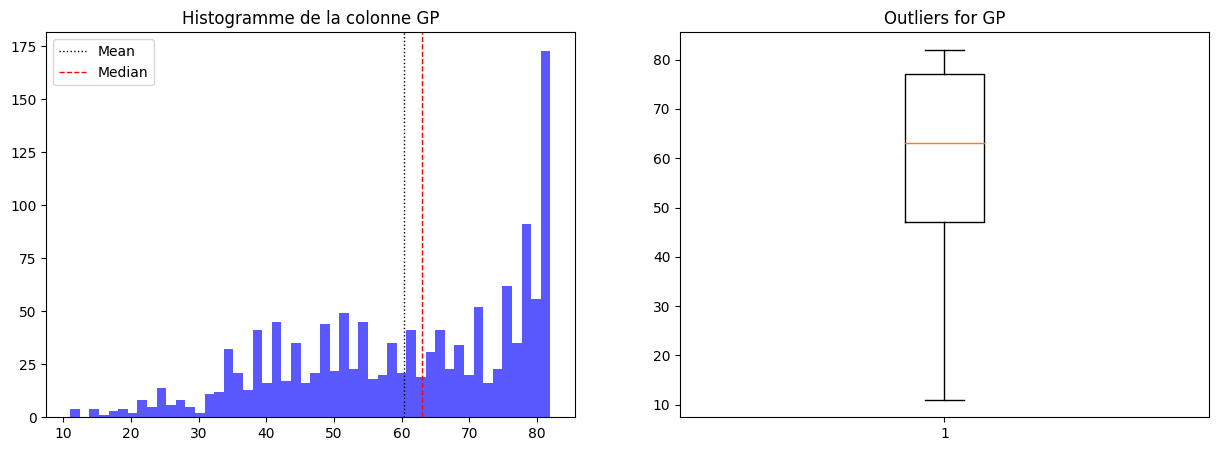

In [ ]:
# GP
distrib_and_outliers(df, "GP")

mean:    6.801
median:  5.550
var:     18.974
ect:     4.356

Skewness de la colonne [PTS]:
La distribution est etalee a droite.
skewness: 1.390

Kurtosis de la colonne [PTS]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 1.920



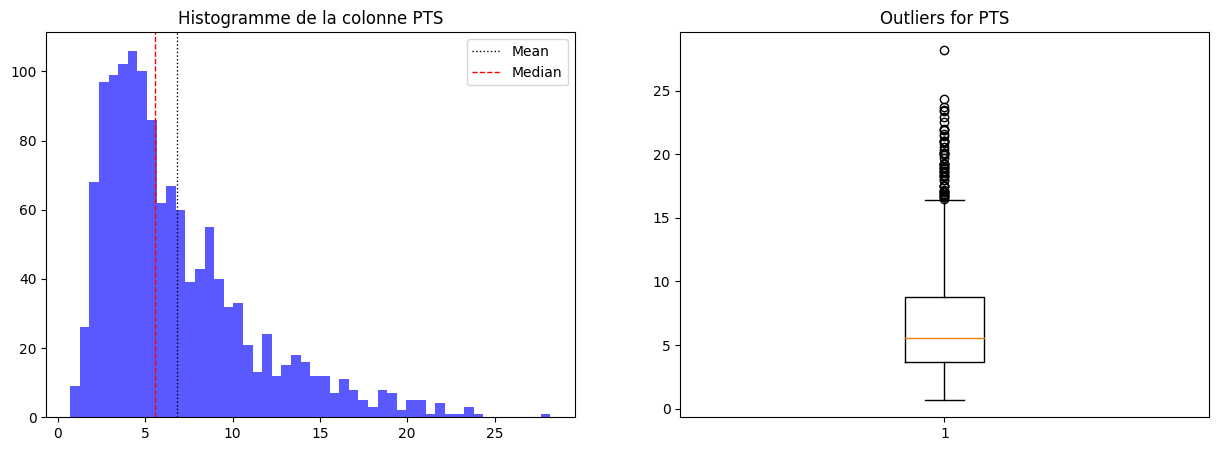

In [ ]:
# PTS
distrib_and_outliers(df, "PTS")

Le skewness étant positif, nous pouvons tester si un passage par le logarithme ne permet pas de retrouver une distribution plus symétrique.

mean:    1.917
median:  1.879
var:     0.268
ect:     0.517

Skewness de la colonne [PTS]:
La distribution est etalee a droite.
skewness: 0.210

Kurtosis de la colonne [PTS]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.470



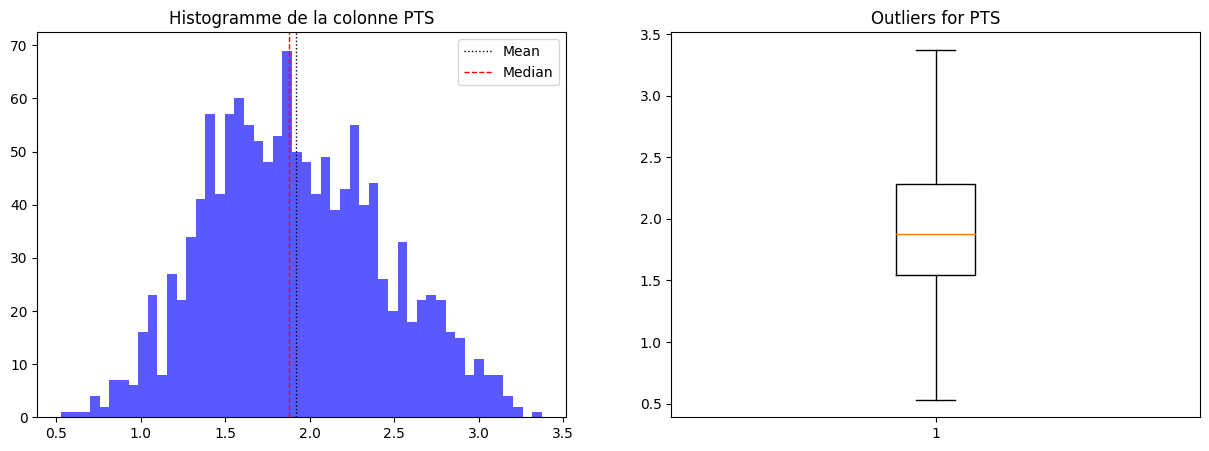

In [ ]:
df["PTS"] = np.log(df["PTS"] + 1)
distrib_and_outliers(df, "PTS")

mean:    44.169
median:  44.100
var:     37.643
ect:     6.135

Skewness de la colonne [FG%]:
La distribution est etalee a droite.
skewness: 0.210

Kurtosis de la colonne [FG%]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.620



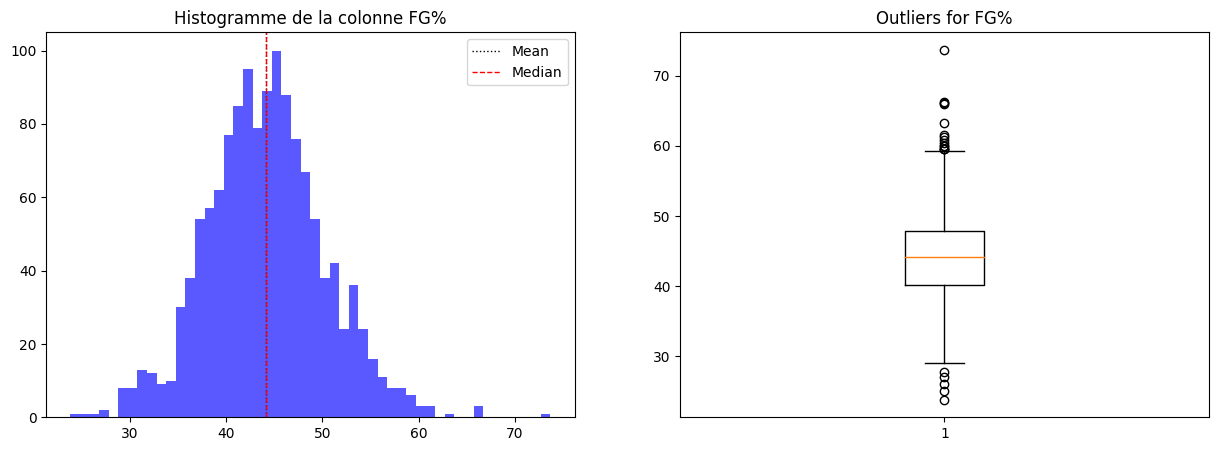

In [ ]:
# FG%
distrib_and_outliers(df, "FG%")

Face aux outliers présents, nous pouvons appliquer un filtre sur nos données.

Ce dernier se basant sur le z-score, nous devons choisir une valeur de seuil.

Je fais le choix d'utiliser "zscore_seuil = 2.5"

In [ ]:
def zscore_filter(tableau, colonne_nom, zscore_seuil=2.5):
    return(tableau[(np.abs(stats.zscore(tableau[colonne_nom])) <= zscore_seuil)])

Nombre de lignes supprimées = 18
mean:    44.054
median:  43.950
var:     33.251
ect:     5.766

Skewness de la colonne [FG%]:
La distribution est etalee a droite.
skewness: 0.050

Kurtosis de la colonne [FG%]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.160



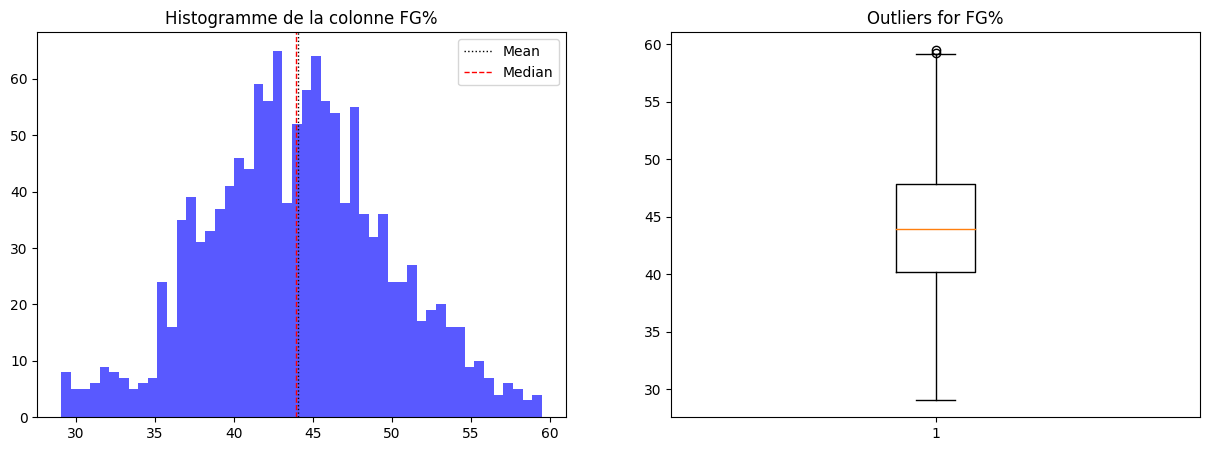

In [ ]:
# FG%

# z-score filter
nbr_lignes = len(df)-len(zscore_filter(df, "FG%"))
print(f"Nombre de lignes supprimées = {nbr_lignes}")

df = zscore_filter(df, "FG%")

# show distribution and outliers
distrib_and_outliers(df, "FG%")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

mean:    19.309
median:  22.400
var:     256.570
ect:     16.018

Skewness de la colonne [3P%]:
La distribution est etalee a droite.
skewness: 0.290

Kurtosis de la colonne [3P%]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.320



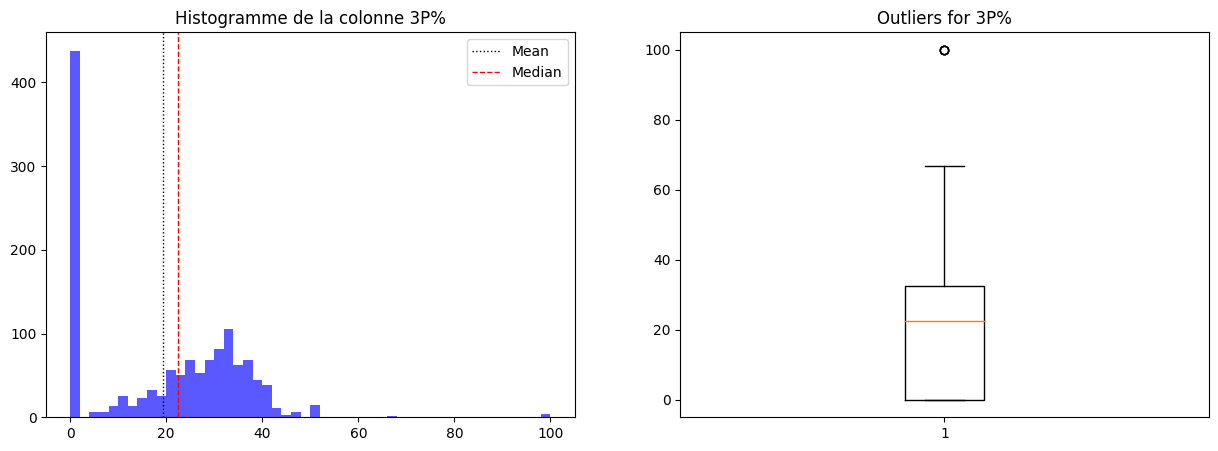

In [ ]:
# 3P%
distrib_and_outliers(df, "3P%")

Il y a ici un outlier à 100.

Or, la variable visualisée étant un pourcentage, cette outlier n'est pas aberrant, je décide de le conserver.

Nombre de lignes supprimées = 30

mean:    70.932
median:  71.500
var:     85.128
ect:     9.226

Skewness de la colonne [FT%]:
La distribution est etalee a gauche.
skewness: -0.320

Kurtosis de la colonne [FT%]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.220



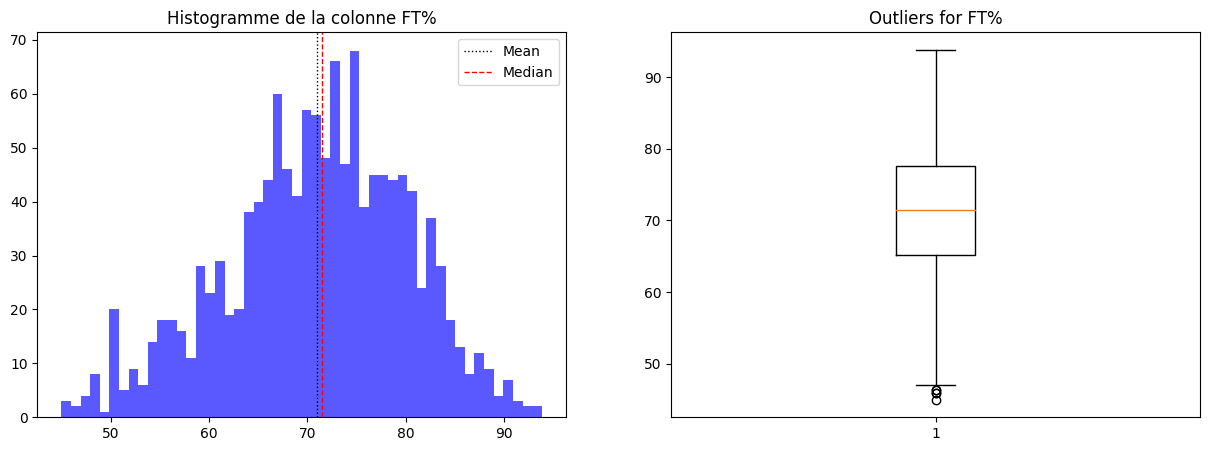

In [ ]:
# FT%

# z-score filter
nbr_lignes = len(df)-len(zscore_filter(df, "FT%"))
print(f"Nombre de lignes supprimées = {nbr_lignes}\n")

df = zscore_filter(df, "FT%")

# show distribution and outliers
distrib_and_outliers(df, "FT%")

Les outliers encore présents sont du même ordre de grandeur que la valeur Q1.

Je fais le choix de les conserver.

mean:    0.636
median:  0.588
var:     0.120
ect:     0.346

Skewness de la colonne [OREB]:
La distribution est etalee a droite.
skewness: 0.580

Kurtosis de la colonne [OREB]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.260



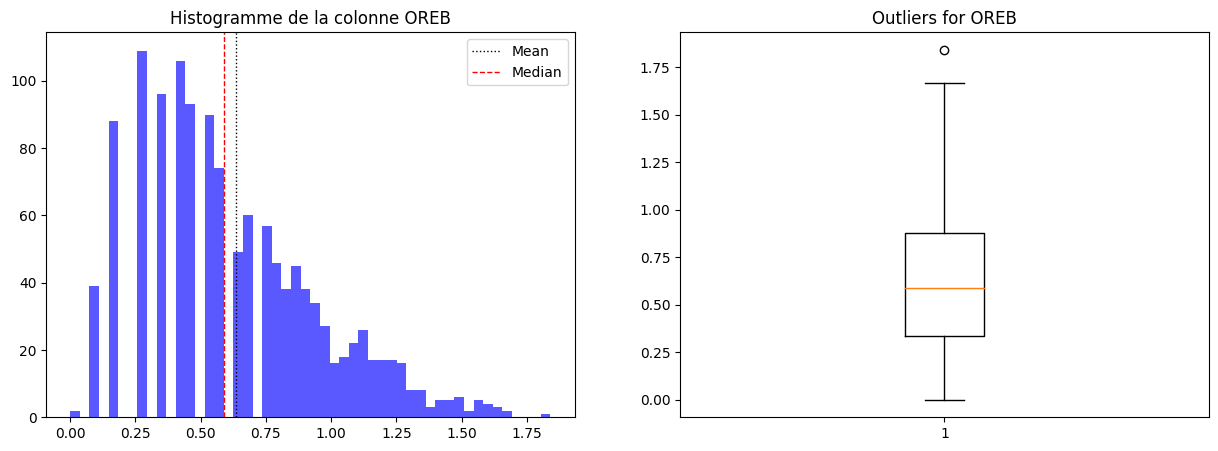

In [ ]:
# OREB
df["OREB"] = np.log(df["OREB"] + 1)
distrib_and_outliers(df, "OREB")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

mean:    1.024
median:  0.993
var:     0.166
ect:     0.407

Skewness de la colonne [DREB]:
La distribution est etalee a droite.
skewness: 0.390

Kurtosis de la colonne [DREB]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.330



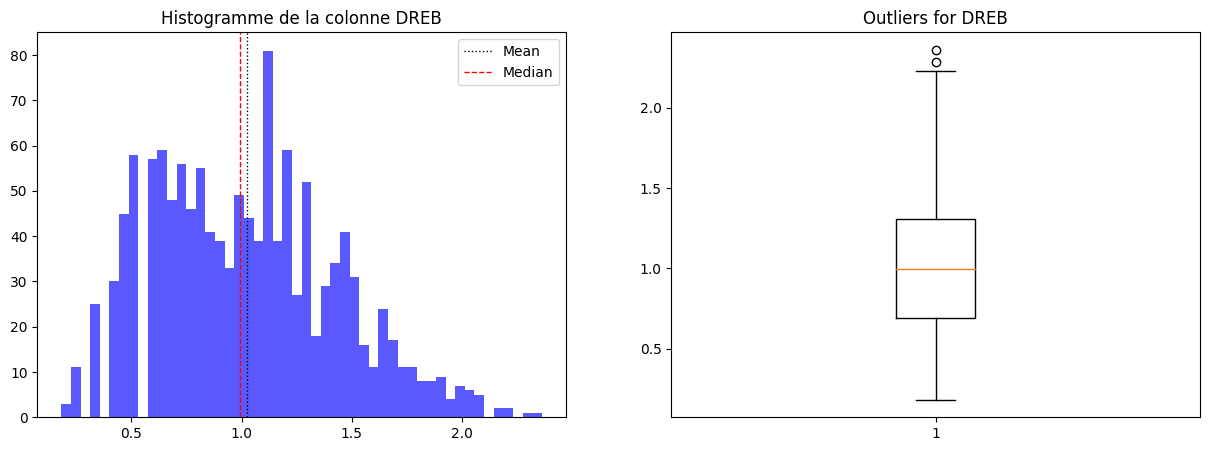

In [ ]:
# DREB
df["DREB"] = np.log(df["DREB"] + 1)
distrib_and_outliers(df, "DREB")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

Nombre de lignes supprimées = 4

mean:    0.823
median:  0.742
var:     0.214
ect:     0.462

Skewness de la colonne [AST]:
La distribution est etalee a droite.
skewness: 0.690

Kurtosis de la colonne [AST]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.050



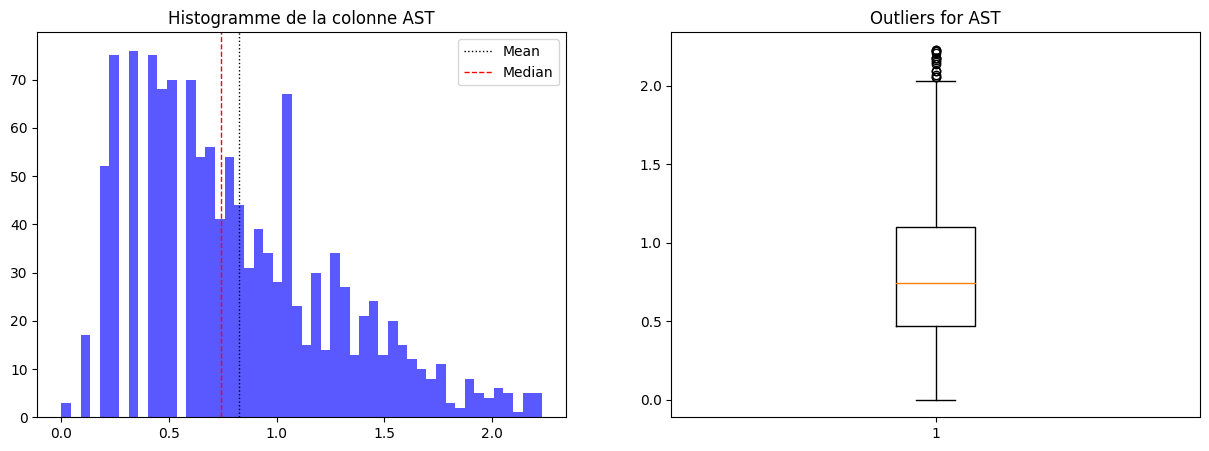

In [ ]:
# AST
df["AST"] = np.log(df["AST"] + 1)

# z-score filter
nbr_lignes = len(df)-len(zscore_filter(df, "AST", zscore_seuil=3))
print(f"Nombre de lignes supprimées = {nbr_lignes}\n")

df = zscore_filter(df, "AST", zscore_seuil=3)

# show distribution and outliers
distrib_and_outliers(df, "AST")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

mean:    0.458
median:  0.405
var:     0.052
ect:     0.228

Skewness de la colonne [STL]:
La distribution est etalee a droite.
skewness: 0.660

Kurtosis de la colonne [STL]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.100



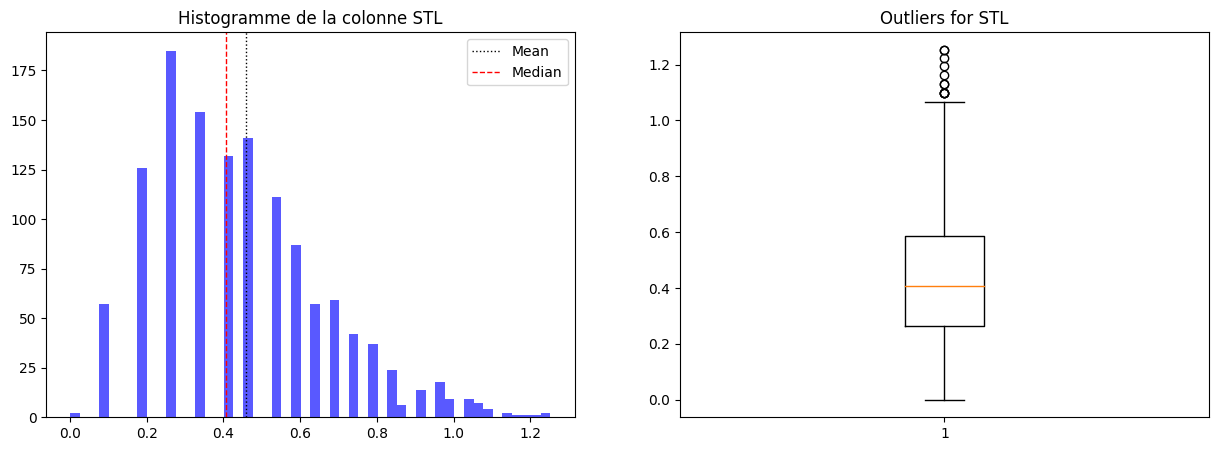

In [ ]:
# STL
df["STL"] = np.log(df["STL"] + 1)

distrib_and_outliers(df, "STL")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

Nombre de lignes supprimées = 15

mean:    0.268
median:  0.182
var:     0.053
ect:     0.230

Skewness de la colonne [BLK]:
La distribution est etalee a droite.
skewness: 1.180

Kurtosis de la colonne [BLK]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.900



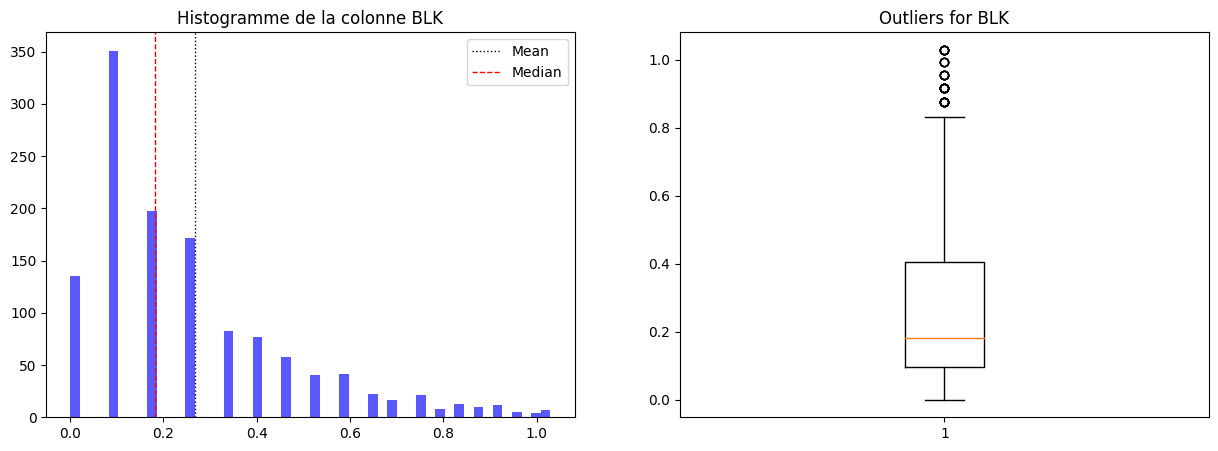

In [ ]:
# BLK
df["BLK"] = np.log(df["BLK"] + 1)

# z-score filter
nbr_lignes = len(df)-len(zscore_filter(df, "BLK", zscore_seuil=3))
print(f"Nombre de lignes supprimées = {nbr_lignes}\n")

df = zscore_filter(df, "BLK", zscore_seuil=3)

# show distribution and outliers
distrib_and_outliers(df, "BLK")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

mean:    0.739
median:  0.693
var:     0.086
ect:     0.293

Skewness de la colonne [TOV]:
La distribution est etalee a droite.
skewness: 0.540

Kurtosis de la colonne [TOV]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -0.040



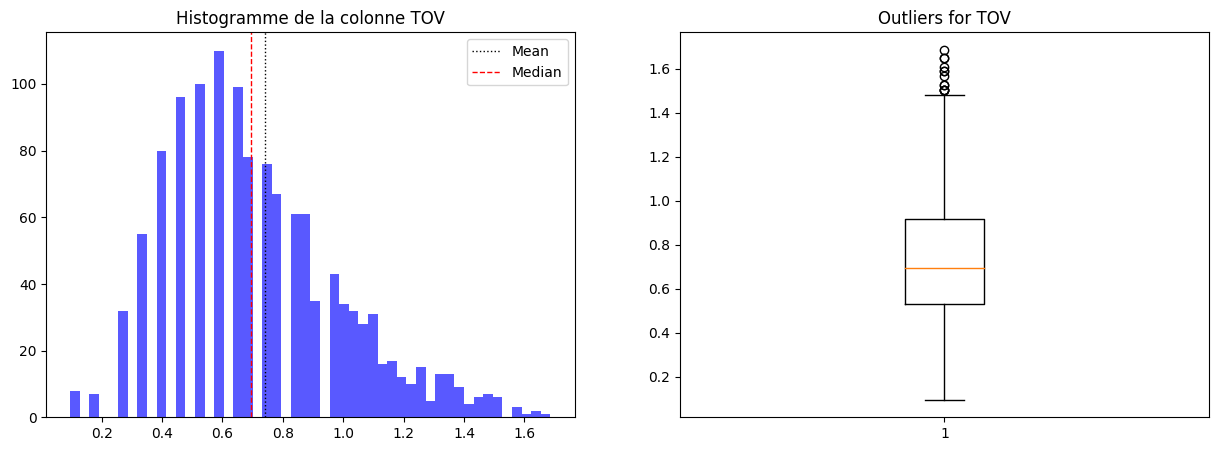

In [ ]:
# TOV
df["TOV"] = np.log(df["TOV"] + 1)
distrib_and_outliers(df, "TOV")

Les outliers présents sont du même ordre de grandeur que la valeur Q3.

Je fais le choix de les conserver.

# Déséquilibre du jeu de données

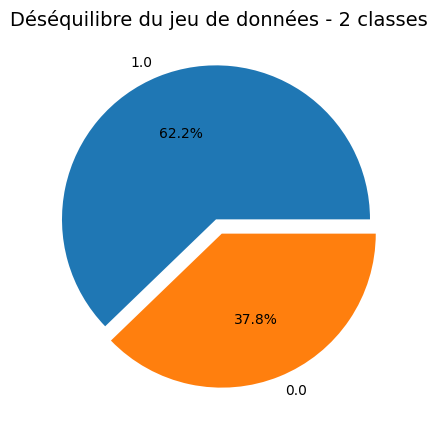

In [ ]:
# Visualisation du déséquilibre à l'aide d'un graphique pie chart
plt.style.use(['default'])
pie, ax = plt.subplots(figsize=[10,5])
labels = df.TARGET_5Yrs.value_counts().keys()
plt.pie(
    x=df.TARGET_5Yrs.value_counts(),
    autopct="%.1f%%",
    explode=[0.05]*2,
    labels=labels
)
plt.title("Déséquilibre du jeu de données - 2 classes", fontsize=14);

Il y a un déséquilibre entre les classes positives et négatives.
Il sera nécessaire de prendre en compte ce déséquilibre lors de la construction des jeux de données d'entraînement et de test.

De plus, il faudra aussi prendre en compte ce déséquilibre lors de la phase de modélisation.

In [ ]:
# Estimate class weights based on the imbalance of the data set

neg = df.TARGET_5Yrs.value_counts()[0]
pos = df.TARGET_5Yrs.value_counts()[1]

print("neg = {}\npos = {}\n".format(neg, pos))

# weigts to correct imbalance:
total = neg + pos

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

neg = 481
pos = 792

Weight for class 0: 1.32
Weight for class 1: 0.80


# Conclusion

In [ ]:
print(f"Taille du dataset final = {df.shape}")
print(f"Nombre de lignes supprimées = {nbr_lignes_original - df.shape[0]}")
print(f"Nombre de colonnes supprimées = {nbr_col_original - df.shape[1]}")

Taille du dataset final = (1273, 12)
Nombre de lignes supprimées = 67
Nombre de colonnes supprimées = 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1339
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1273 non-null   int64  
 1   PTS          1273 non-null   float64
 2   FG%          1273 non-null   float64
 3   3P%          1273 non-null   float64
 4   FT%          1273 non-null   float64
 5   OREB         1273 non-null   float64
 6   DREB         1273 non-null   float64
 7   AST          1273 non-null   float64
 8   STL          1273 non-null   float64
 9   BLK          1273 non-null   float64
 10  TOV          1273 non-null   float64
 11  TARGET_5Yrs  1273 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 129.3 KB


Le dataset occupe à présent, environ, 129 KB de mémoire RAM.

In [ ]:
# Enregistrement du dataset
df.to_csv("/content/drive/MyDrive/Gaetan_Travail/ML/df_a_utiliser.csv", index=False)

Remarque : afin d'améliorer mon modèle, lors des prochains projets, il serait préférable d'intégrer la transformation log au pipeline final. Ainsi, il y a une diminution du risque d'oublier de transformer les données avant l'utilisation du modèle dans une API.